Lasso Regression

Mean Absolute Error: 15251.823079416905
Training Time: 0.23441791534423828 seconds
Coefficients:                    Feature   Coefficient
0               MSSubClass    -62.571610
1              LotFrontage     38.292151
2                  LotArea      0.624161
3              OverallQual   9240.071921
4              OverallCond   5494.239743
..                     ...           ...
208  SaleCondition_AdjLand  33024.297583
209   SaleCondition_Alloca   4809.757232
210   SaleCondition_Family    333.047901
211   SaleCondition_Normal   8743.127941
212  SaleCondition_Partial   6639.534974

[213 rows x 2 columns]


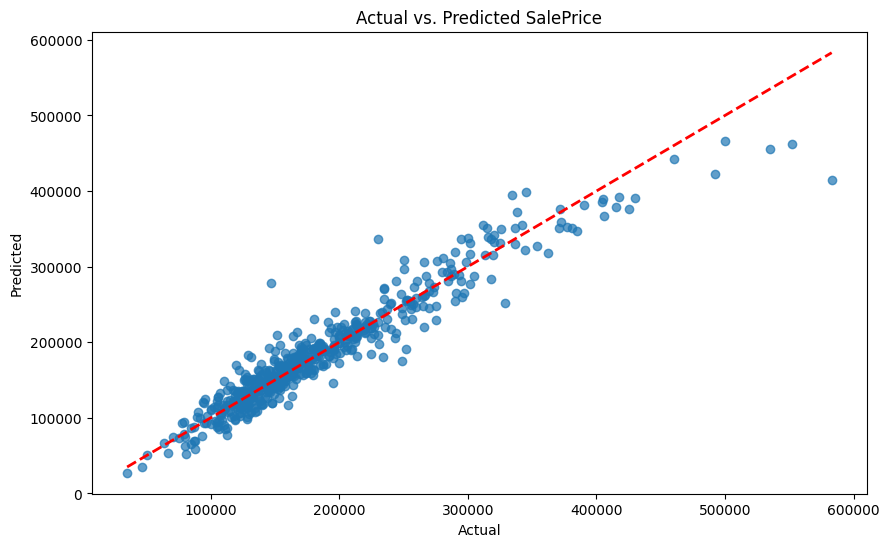

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/AmesData.csv')

# Assuming df is your DataFrame
X = df.drop(columns=['SalePrice'])  # Independent variables
y = df['SalePrice']  # Dependent variable

# Drop columns with missing values
X = X.dropna(axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Lasso model
lasso = Lasso(alpha=5.0)

# Train the model
start_time = time.time()
lasso.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

# Inspect the coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': lasso.coef_
})
print(f"Mean Absolute Error: {mae}")
print(f"Training Time: {training_time} seconds")
print(f"Coefficients: {coefficients}")

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted SalePrice')
plt.show()